In [1]:
import librosa
import librosa.display
from scipy.io import wavfile
import matplotlib.pyplot as plt
import numpy as np
from utils.signal import signal_power, power_to_db, calculateNoiseRatio

import warnings
## Librosa load can't read mp3, therefore it will call audioread instead.
warnings.filterwarnings("ignore", message="PySoundFile failed. Trying audioread instead.")

# Load Audio & Noise File

Length of the Audio: 8505303
Sample Rate: 22050
Power Signal: -47.75929927825928 dB


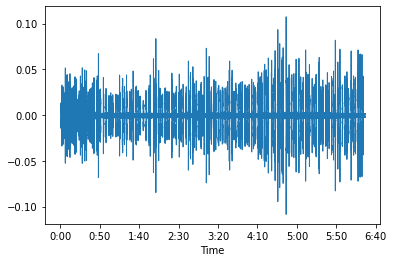

In [4]:
filename = 'voice_command1.mp3'
filepath = '11-2-22/' + filename
audio, sr = librosa.load(filepath)
print("Length of the Audio:", audio.shape[0])
print("Sample Rate:", sr)
print("Power Signal:", 10 * np.log10(np.mean(audio**2)), 'dB')

librosa.display.waveshow(audio, sr=sr)
plt.show()

Length of the Audio: 4317120
Sample Rate: 22050
Power Signal: -28.92080307006836 dB


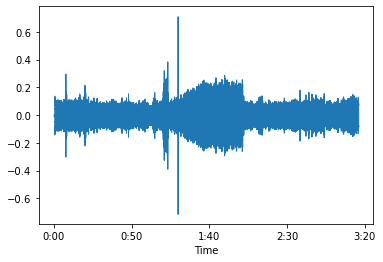

In [5]:
filename = 'noise.mp3'
filepath = '11-2-22/' + filename
noise, sr = librosa.load(filepath)
print("Length of the Audio:", noise.shape[0])
print("Sample Rate:", sr)
print("Power Signal:", 10 * np.log10(np.mean(noise**2)), 'dB')

librosa.display.waveshow(noise, sr=sr)
plt.show()

# Padding noise

In [20]:
len_audio = audio.shape[0]
len_noise = noise.shape[0]

n_noise = len_audio // len_noise
offset_noise = len_audio % len_noise

try:
  noise_pad = np.concatenate([noise]*n_noise)
  noise_pad = np.concatenate([noise_pad, noise[:offset_noise]])
except:
  noise_pad = noise[:offset_noise]

noise = noise_pad

# Adjust Power of noise

In [68]:
snr_db = -10
ratio = calculateNoiseRatio(audio, noise_pad, snr_db)
noise_adjust = noise * ratio

print("Power of adjusted noise:", power_to_db(signal_power(noise_adjust)), "dB")

Power of adjusted noise: -37.75930166244507 dB


# Add noise to the audio

In [69]:
print("SNR dB:", round(power_to_db(signal_power(audio)) - power_to_db(signal_power(noise_adjust))))
noise_added = audio + noise_adjust

wavfile.write(f'11-2-22/voice_command1_snr{snr_db}.mp3', sr, noise_added.astype('f4'))

SNR dB: -10
